In [227]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import plotly.graph_objects as go
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
import plotly.of

%matplotlib inline

In [24]:
data=pd.read_csv('HR.csv') 
data[:10]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


Основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [55]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Корреляционная матрица для переменных

In [15]:
data.corr().style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1,0.105021,-0.14297,-0.0200481,-0.100866,0.0586972,-0.388375,0.0256052
last_evaluation,0.105021,1,0.349333,0.339742,0.131591,-0.00710429,0.00656712,-0.00868377
number_project,-0.14297,0.349333,1,0.417211,0.196786,-0.00474055,0.0237872,-0.00606396
average_montly_hours,-0.0200481,0.339742,0.417211,1,0.127755,-0.0101429,0.0712872,-0.00354441
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1,0.00212042,0.144822,0.0674329
Work_accident,0.0586972,-0.00710429,-0.00474055,-0.0101429,0.00212042,1,-0.154622,0.0392454
left,-0.388375,0.00656712,0.0237872,0.0712872,0.144822,-0.154622,1,-0.0617881
promotion_last_5years,0.0256052,-0.00868377,-0.00606396,-0.00354441,0.0674329,0.0392454,-0.0617881,1


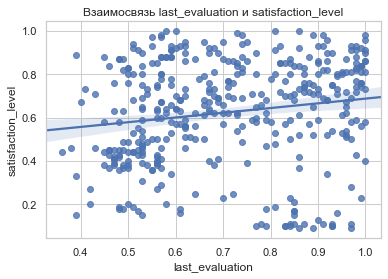

In [247]:
plt.title('Взаимосвязь last_evaluation и satisfaction_level')
sns.regplot(x= 'last_evaluation', y='satisfaction_level',data=data.sample(400), fit_reg=True)

plt.show()

In [254]:
data_1 = data[data['left'] == 1]
data_0 = data[data['left'] == 0]

In [259]:
data_1 = data_1.groupby(data_1['average_montly_hours'].round(-1)).size()

In [258]:
data_0 = data_0.groupby(data_0['average_montly_hours'].round(-1)).size()

In [270]:
fig = go.Figure(data=[
    go.Bar(name='', x=data_0.index, y=data_0),
    go.Bar(name='', x=data_1.index, y=data_1)
])


fig.update_layout(title = 'Взаимосвязь average_montly_hours и left')

fig.show()

In [243]:
data.groupby('average_montly_hours').count()['left']

average_montly_hours
96      6
97     14
98     23
99     11
100    19
       ..
306    18
307    14
308    20
309    16
310    18
Name: left, Length: 215, dtype: int64

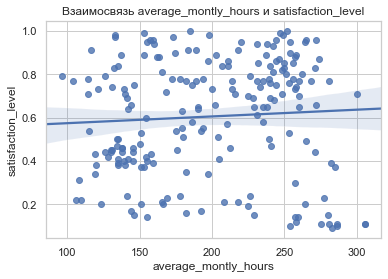

In [274]:
plt.title('Взаимосвязь average_montly_hours и satisfaction_level')

plt.title('Взаимосвязь average_montly_hours и satisfaction_level')
sns.regplot(x= 'average_montly_hours', y='satisfaction_level',data=data.sample(200), fit_reg=True)

plt.show()

t-test взаимосвязи между несколькими переменными

In [174]:
stats.ttest_ind(data['number_project'], data['average_montly_hours'])

Ttest_indResult(statistic=-483.54229603425085, pvalue=0.0)

In [175]:
stats.ttest_ind(data['number_project'], data['last_evaluation'])

Ttest_indResult(statistic=303.8042100031241, pvalue=0.0)

In [176]:
stats.ttest_ind(data['left'], data['time_spend_company'])

Ttest_indResult(statistic=-262.50803476202543, pvalue=0.0)

Работает работников по департаментам

In [177]:
data.groupby('sales')['satisfaction_level'].count().to_frame()

,satisfaction_level
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


Распределение сотрудников по зарплатам

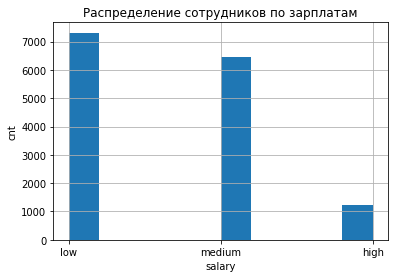

In [59]:
n, bins, patches = plt.hist(data['salary'], 10)

plt.xlabel('salary')
plt.ylabel('cnt')
plt.title('Pаспределение сотрудников по зарплатам')
plt.grid(True)
plt.show()

# data['salary'].value_counts()

Распределение сотрудников по зарплатам совместно с департаментами

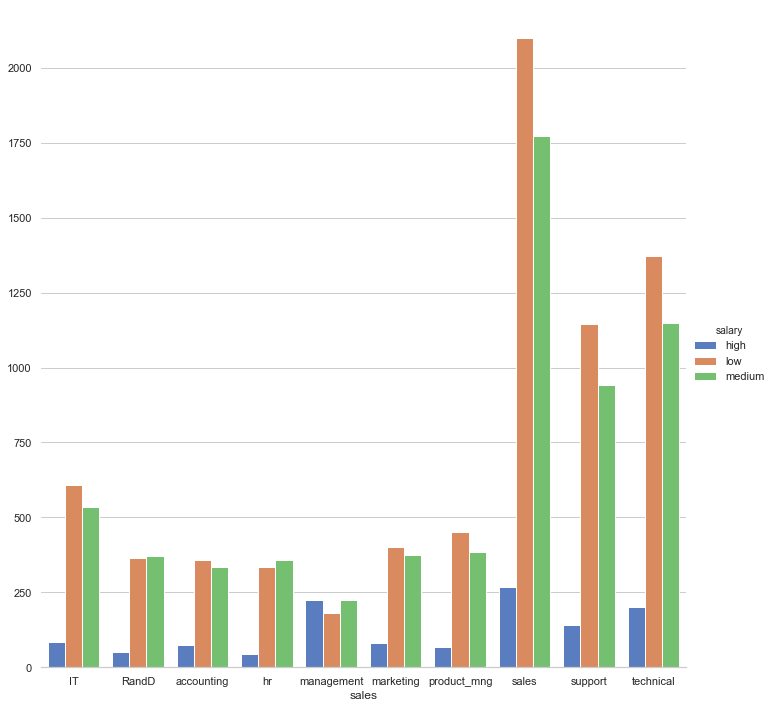

In [76]:
tmp = data.groupby(['salary', 'sales']).count().reset_index()

sns.set(style="whitegrid")

g = sns.catplot(x="sales", y = 'satisfaction_level', hue="salary", data=tmp,
                height=10, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("")

Сотрудников покинули компанию

In [77]:
data['left'].sum()

3571

Несколько гипотез для данных

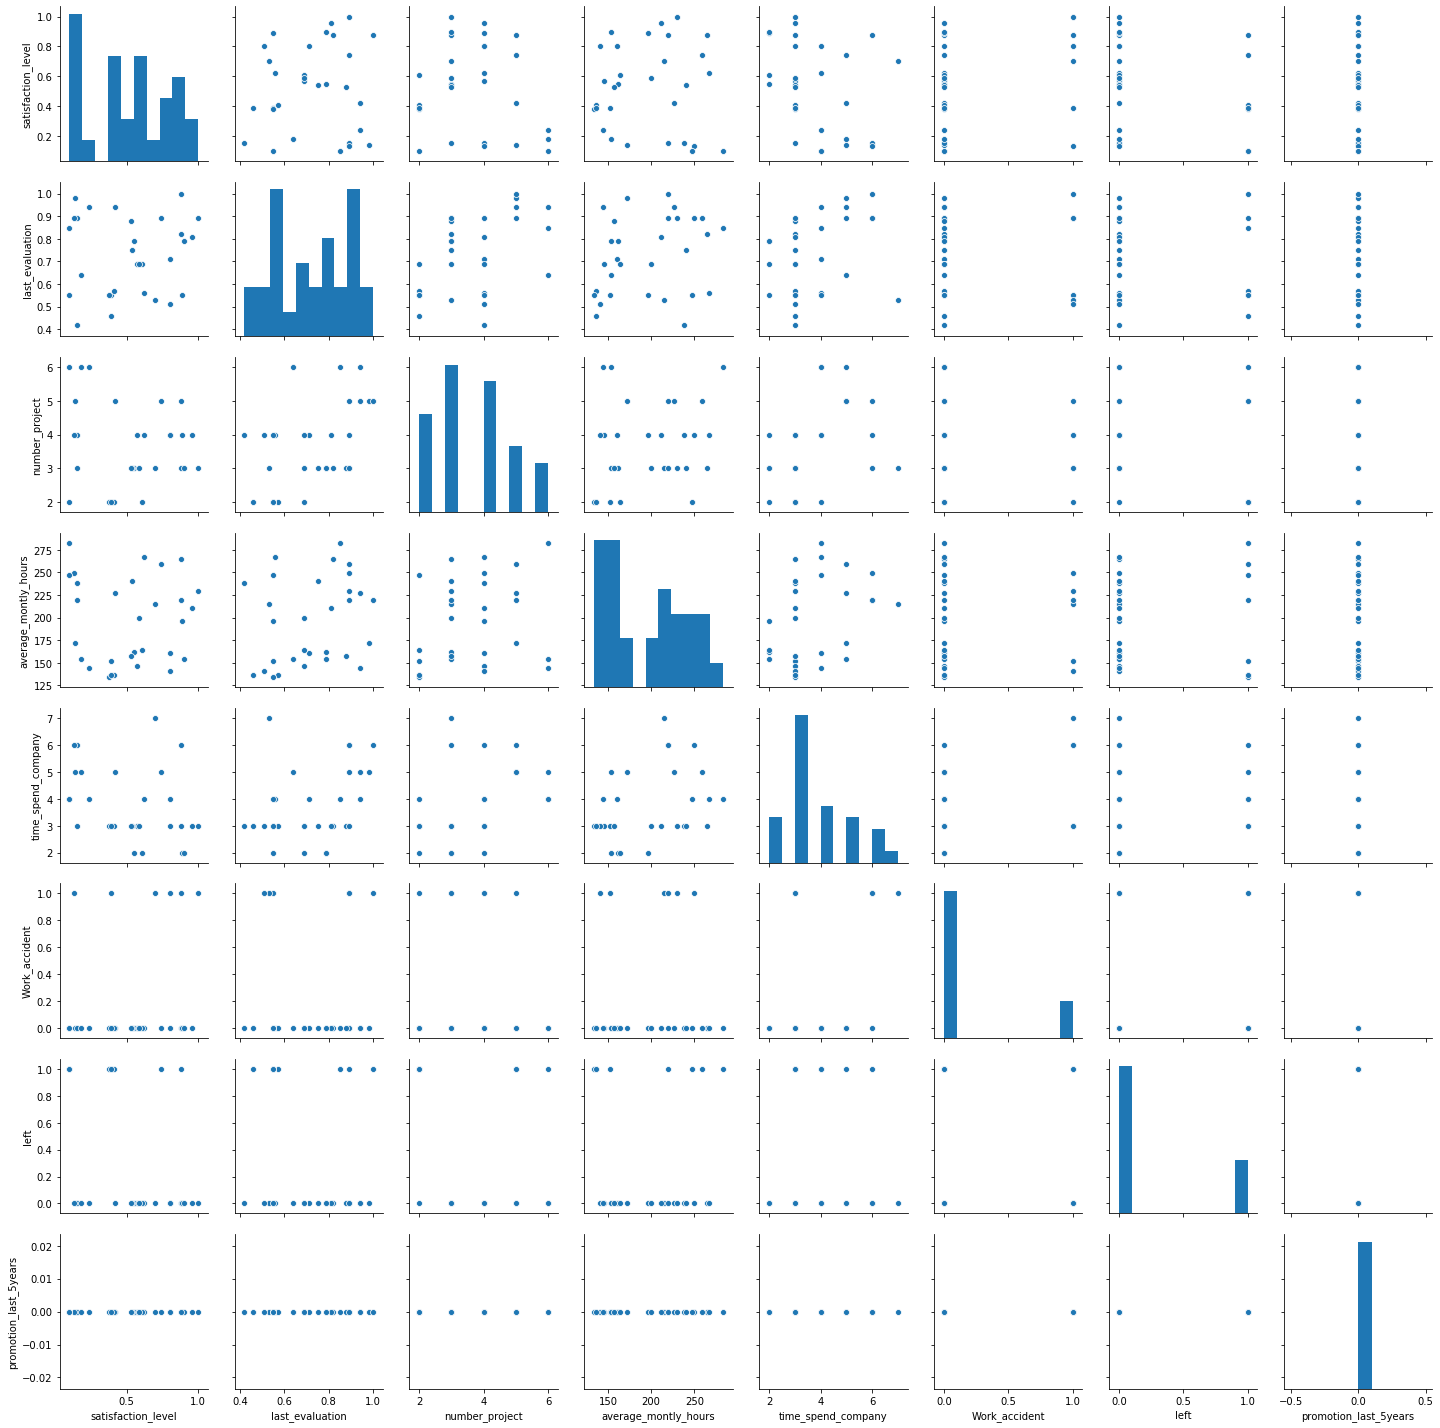

In [51]:
sns.pairplot(data=data.sample(30))

1) Сотрудники у которых был Work_accident покидают компани чаще

это предположение не верно

In [81]:
data.groupby(['Work_accident','left']).size().to_frame()

0
Work_accident left      
0             0     9428
              1     3402
1             0     2000
              1      169

2) Сотрудники с более низким satisfaction_level покидают компанию чаще

Так и есть

In [277]:
data.groupby('left')["satisfaction_level"].agg(['mean','std'])

,mean,std
left,,
0,0.666810,0.217104
1,0.440098,0.263933


3) Сотрудники у которых не было повышния 5 лет покидают компанию

Имеет место

In [190]:
data.groupby('left')["promotion_last_5years"].agg(['mean','std'])

,mean,std
left,,
0,0.026251,0.159889
1,0.005321,0.072759


4) Сторудники с меньшим last_evaluation покидают компанию

Нет

In [188]:
data.groupby('left')["last_evaluation"].agg(['mean','std'])

,mean,std
left,,
0,0.715473,0.162005
1,0.718113,0.197673


In [189]:
data.groupby('left')["average_montly_hours"].agg(['mean','std'])

,mean,std
left,,
0,199.060203,45.682731
1,207.419210,61.202825


Логистическая ргрессия для целевого значения от осстальных признаков

In [280]:
X = data.drop(['left','sales','salary'], axis=1)
y = data.left

In [281]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [282]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [283]:
y_test.size, y_test.sum()

(3750, 834)

In [284]:
from sklearn.metrics import classification_report

model_pred = model.predict(X_test)

print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2916
           1       0.49      0.26      0.34       834

    accuracy                           0.78      3750
   macro avg       0.65      0.59      0.60      3750
weighted avg       0.74      0.78      0.75      3750

